<a href="https://colab.research.google.com/github/seungtaemoon/Portfolio/blob/master/%EB%8F%85%EC%9D%BC_%EC%9D%8C%EC%95%85_%EC%8B%9C%EC%9E%A5_%EB%B6%84%EC%84%9D_%EB%AC%B8%EC%8A%B9%ED%83%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 독일의 음악시장은 어떤 모습일까?

## 초록:
독일의 음악시장은 미국, 일본, 영국에이어 세계 4위를 차지하고 있다. 독일인들은 어떤 장르의 음악을 좋아하고 어떤 나라의 음악을 대부분 소비할까? 이와 더불어서, 그곳에서 우리 한국음악의 가능성은 어떻까? 독일의 오피셜 차트 데이터를 분석해봄으로써 이 질문에 답해보고자 한다.

## 목차:

1. **서론**

> **1–1. 데이터 소스 선택과 그 이유**

> **1–2. 데이터 전처리 과정**

2. **본론**

> **2–1. 데이터 분석 및 시각화**

> **2–2. 가설 검증**

> **3–3. 머신 러닝 (PCA) 적용 및 시각화**

3. **결론**


## 1. 서론:

IFPI(International Federation of the Phonographic Industry)는 매년 각 국가의 전 세계 음악시장 점유율을 조사한다. 2019년 기준, 세계 음악시장에서 가장 큰 다섯 개의 손가락은 미국, 일본, 영국, 독일, 프랑스 순으로, 아쉽게도 한국은 6위를 기록했다. 

Kpop으로 대표되는 한국음악은 일본을 포함한 아시아의 대부분의 국가에서는 매우 큰 인기를 누리고 있지만, 상대적으로 유럽 및 서구 국가에서는 그 영향력이 적었다. 최근 BTS가 빌보드 차트등에서 좋은 성과를 누리면서, 북미 지역은 새로운 한류의 정착지로 주목받고 있다. 유럽 국가인 영국에서도 BTS는 오피셜 차트에서 매우 높은 순위를 기록했으며, 웸블리라는 역사적인 곳에서도 매진을 기록하며 공연했다. 이미 영어권 국가에서 한국의 문화는, 그 위상이 어느정도 잡혀져 있다고 볼 수 있다.

그러나, 독일 및 프랑스등 실질적으로 EU를 이끄는 나라들에서는 케이팝이 점점 유명세를 타는 곳이기도 하고 영미권의 팝이 오랜기간 어느 정도 사랑받아온 곳이지만, 상대적으로 독자적인 문화를 가지고 있는 곳이다. 내가 이전에 독일을 방문했을 때, 생각보다 열린 사고를 가진 사람이 많으면서도, 자국의 문화 우선주의가 강한 분위기가 느껴졌다. 할리우드 영화가 극장에 개봉되거나 티비에 방영될 때에도, 대부분 자막이 아닌 “더빙"을 통해 상영된다. 거의 모든 방송 프로그램을 독일어로 방영한다. 음악분야는 영미권 음악이 주로 소비될 것이라는 나의 예상과는 다르게, 음악 채널들 역시 독일 아티스트들의 뮤직비디오를 방영하고 있었다.

국내팬들에게도 익숙한 네덜란드 출신의 Martin Garrix, 프랑스 출신의 David Guetta, 독일을 대표하는 Zedd 등 유럽에는 세계적으로 유명한 DJ가 많다. 아마도 유럽에서는 이러한 하우스 장르의 Electronic Dance Music(EDM)이 가장 인기가 많을 것이라고 본다. 자연스럽게, 독일에서도 최근 가장 인기가 많은 음악 장르일 것이라고 에상된다. 

미국, 영국, 일본 만큼은 아니지만, 세계 음악시장에서 네 번째로 중요한 위치를 차지하고 있는 독일의 음악시장은 어떤 모습일까? 이러한 질문에서 출발하여, 독일의 음악시장에서는 어떠한 장르의 음악들이 인기를 끌고 있는지 궁금해졌다. 먼저 독일에서 가장 인기가 많은 음악 장르가 무엇인지 살펴보고, 과연 독일사람들은 내가 예상하는 것처럼, 영미권 음악보다 자국의 음악을 더 많이 소비하는지 알아볼 것이다. 또한, 그곳에서 현재 떠오르고있는 우리 한국음악의 위상은 어떤지도 조명해보겠다. 

### 1-1. 데이터 소스:

데이터의 신빙성을 위해, 독일의 가장 권위있는 차트인 오피지엘차트(Offizielle Chart)에서 데이터를 가져오기로 하였다. 오피지엘 차트는 독일의 가장 공신력있는 차트로써, 유튜브 뮤직 차트(YouTube Music Chart), 스포티파이(Spotify) 차트 및 MTV 차트를 합산하여 매주 한 주간 가장 인기있는 음악을 1위 부터 100위까지 순위를 매긴다. 이 차트의 가장 최근 데이터인 10월 첫째 주 데이터를 바탕으로 분석을 해 보았다. 웹 상에서 데이터를 가져오기 위해 Python의 Requests 및 BeautifulSoup 라이브러리를 사용했다.


In [1]:
# BeautifulSoup 및 requests 리아브러리들을 활용하여 웹상에서 데이터를 가져온다.

import requests
from bs4 import BeautifulSoup

URL = 'https://www.offiziellecharts.de/charts/single/for-date-1601478000000'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [2]:
main_content = soup.find('table', attrs = {'class': 'table chart-table'})

In [3]:
print(main_content.prettify())

<table class="table chart-table">
 <tr class="drill-down-link">
  <td class="ch-pos">
   <a class="drill-down" href="/titel-details-2058710">
   </a>
   <span class="this-week">
    1
   </span>
  </td>
  <td class="ch-trend">
   <span class="last-week">
    1
   </span>
  </td>
  <td class="ch-cover">
   <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2058710_s.jpg') top left no-repeat;">
   </span>
  </td>
  <td class="ch-info">
   <div class="wrap">
    <span class="info-artist">
     24kGoldn feat. Iann Dior
    </span>
    <span class="info-title">
     Mood
    </span>
    <span class="info-label">
     SME - Columbia
    </span>
    <span class="play-media">
     <span class="plus-data">
      In Charts:
      <b>
       5                                                        W
      </b>
     </span>
     <span class="plus-data">
      Peak:
      <b>
       1
      </b>
     </span>
     <!-- -->
     <span class="play-video video-more" dat

###1-2 데이터 전처리

가저온 데이터들은 HTML 태그로 가득한, 좀 더러운 데이터이다. 이 데이터에서 내가 원하는 데이터들을 세부적으로 분리하기로 했다. 다행이도, 태그의 class이름에 따라 분류가 가능했다. 

내가 가져오고자한 데이터들은 모두 "span" 이었다. 다행이도, 이들을 구분할 수 있는 유니크한 class이름들이 있었다.

1. "this-week": 금주의 순위 정보
2. "last-week": 지난주 순위 정보
3. "info-artist": 아티스트 이름
4. "info-title": 노래 제목
5. "info-label": 소속 레이블 이름
6. "plus-data": 차트인 기간(In Charts)와 최고기록순위(Peak)의 정보, 추가적으로 한번 더 분류가 필요하다. 

In [4]:
# 데이터 분류하기
this_week = main_content.find_all('span', class_='this-week')
last_week = main_content.find_all('span', class_='last-week')
info_artist = main_content.find_all('span', class_='info-artist')
info_title = main_content.find_all('span', class_='info-title')
info_label = main_content.find_all('span', class_='info-label')
in_charts_peak = main_content.find_all('span', class_="plus-data")

이들을 분류하기 위해 몇 가지 함수를 만들었다. 원활한 데이터의 처리를 위해 모든 함수가 결과를 Pandas의 Series 형태로 return하게 했다. 

* remove_html_tags: HTML태그 제거를 위한 함수
* num_converter: 순위 데이터들(숫자형)을 정수(int)로 바꾼다.
  - 여기서 주의할 것은 last_week의 데이터의 경우, 차트에 새로운 곡으로 진입한 아티스트들에 대해서는 이전 주의 순위기록이 없기 때문에 " "로 처리되었다. 이 경우 Null값이라고 볼 수 있는데, 이러한 Null값들은, 새로 진입했다는 의미에서 "new"라는 string으로 대체하였다.  
* text_cleaner: info_artist 같은, string데이터들을 처리하는 함수이다.
* w_cleaner: in_charts_peak 데이터에서 일주일의 단위를 표현하는 "W"라는 string을 제거하고 위한 함수 
* charts_peak_separator: in_charts_peak 데이터에서 차트인 정보(In Charts(Weeks))와 최고순위정보(Peak)정보를 나누고 정수화시키는 함수. (w_cleaner이후에 사용되었다.)

In [5]:
# 데이터 전처리를 위한 함수들
import pandas as pd

# HTML태그 제거
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# 숫자 데이터들을 정수(int)로 변환
# Null값은 "new"로 대체
def num_converter(text):
  list_1 = []
  for i in text:
    result = str(i)
    new = remove_html_tags(result)
    new = new.strip("\n")
    new = new.strip()
    if new == '':
     a = new.replace('', 'new')
     list_1.append(a)
    else:
      list_1.append(int(new))
  list_1 = pd.Series(list_1)
  return list_1

# String 데이터를 처리하기 위한 함수
def text_cleaner(text):
  list_1 = []
  for i in text:
    result = str(i)
    new = remove_html_tags(result)
    new = new.strip("\n")
    new = new.strip()
    list_1.append(new)
  list_1 = pd.Series(list_1)
  return list_1

# in_charts_peak 데이터에서 "W"라는 string 제거
def w_cleaner(text):
  list_1 = []
  for i in text:
    if "W" in i:
      a = i.replace("W", "")
      a = a.strip()
      a = a.split(":")
      list_1.append(a)
    else:
      b = i.split(":") 
      list_1.append(b)
  list_1 = pd.Series(list_1)
  return list_1

# in_charts_peak 데이터에서 "In Charts(Weeks)" 데이터와 "Peaks" 데이터를 분류하고 함수화하기 위한 함수 
def charts_peak_separator(text):

  list_charts_peak = []
  list_peak = []

  for i in range(0, len(text), 2):
    k = i+1
    j = text[i]
    l = text[k]
    list_charts_peak.append(int(j[1].strip()))
    list_peak.append(int(l[1].strip()))
  list_charts_peak = pd.Series(list_charts_peak)
  list_peak = pd.Series(list_peak)
  return list_charts_peak, list_peak


먼저 숫자형 데이터를에게는 num_converter함수를 적용한다.

In [6]:
this_week_list = num_converter(this_week)
print(this_week_list.head())

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [7]:
last_week_list = num_converter(last_week)
print(last_week_list.head())

0      1
1    new
2      4
3      8
4      5
dtype: object


다음으로 String 데이터에는 text_cleaner함수를 적용한다. 

In [8]:
info_artist_list = text_cleaner(info_artist)
print(info_artist_list.head())

0                             24kGoldn feat. Iann Dior
1                                          Capital Bra
2                             KitschKrieg feat. Jamule
3    Internet Money &amp; Gunna feat. Don Toliver &...
4                         Jawsh 685 &amp; Jason Derulo
dtype: object


In [9]:
info_title_list = text_cleaner(info_title)
print(info_title_list.head())

0                                Mood
1                Einsam an der Spitze
2                           Unterwegs
3                            Lemonade
4    Savage Love (Laxed - Siren Beat)
dtype: object


In [10]:
info_label_list = text_cleaner(info_label)
print(info_label_list.head())

0             SME - Columbia
1                      Urban
2    SoulForce Records / BMG
3             Internet Money
4             SME - Columbia
dtype: object


In_charts_peak 데이터도 string을 포함하기 때문에, text_cleaner함수를 사용한다. 

In [11]:
in_charts_peak_list = text_cleaner(in_charts_peak)
print(in_charts_peak_list.head())
print(len(in_charts_peak_list))

0    In Charts: 5                                  ...
1                                              Peak: 1
2    In Charts: 1                                  ...
3                                              Peak: 2
4    In Charts: 7                                  ...
dtype: object
200


In_charts_peak의 데이터는 다른 데이터 보다 2배가 더 길다. 따라서 In Charts 및 Peak의 정보를 분리해야한다. 위에서는 잘 보이지 않지만, 사실 위 feature의 모든 데이터는 "W"라는 string을 긴 empty string 뒤에 가지고 있다. 먼저, 위의 텍스트에서 이를 제거한다. 

In [12]:
in_charts_peak_new_list = w_cleaner(in_charts_peak_list)
print(in_charts_peak_new_list.head())

0    [In Charts,  5]
1         [Peak,  1]
2    [In Charts,  1]
3         [Peak,  2]
4    [In Charts,  7]
dtype: object


다음으로 나누어진 리스트를 각각, In Charts 및 Peak 정보로 분리하고 정수화한다. 

In [13]:
list_charts_peak, list_peak = charts_peak_separator(in_charts_peak_new_list)
print(list_charts_peak.head())
print(list_peak.head())

0     5
1     1
2     7
3     6
4    15
dtype: int64
0    1
1    2
2    1
3    4
4    1
dtype: int64


나누어진 데이터들을 하나의 DataFrame으로 통합한다. 먼저, 아직 데이터가 header가 없기 때문에, 각 feature에 대한 정보를 웹사이트를 참조하여, Dictionary의 형태를 통해 각 feature에 지정한다. 이들을 pandas.DataFrame으로 통합한다.

In [14]:
data = {"This Week": this_week_list, "Last Week": last_week_list, "Artist": info_artist_list, "Title": info_title_list, "Label": info_label_list, "In Charts(Weeks)": list_charts_peak, "Peak": list_peak}

df = pd.DataFrame(data)
df

,This Week,Last Week,Artist,Title,Label,In Charts(Weeks),Peak
0,1,1,24kGoldn feat. Iann Dior,Mood,SME - Columbia,5,1
1,2,new,Capital Bra,Einsam an der Spitze,Urban,1,2
2,3,4,KitschKrieg feat. Jamule,Unterwegs,SoulForce Records / BMG,7,1
3,4,8,Internet Money &amp; Gunna feat. Don Toliver &...,Lemonade,Internet Money,6,4
4,5,5,Jawsh 685 &amp; Jason Derulo,Savage Love (Laxed - Siren Beat),SME - Columbia,15,1
...,...,...,...,...,...,...,...
95,96,81,Fourty,Weisser Rauch,Life Is Pain,22,19
96,97,70,Vize x Imanbek x Dieter Bohlen feat. Leony,Brother Louie,Kontor Records,11,64
97,98,97,Kontra K feat. Samra,Tiefschwarz,BMG,11,2
98,99,91,Jack Harlow,Whats Poppin,Atlantic,19,55


데이터를 깔끔하게 정리하고 나서, 잠깐 뿌듯했지만 문제가 하나있었다. 내가 이번 프로젝트에서 답하고자 하는 것은 "독일인들이 어떤 장르의 음악과 어떤 국가의 음악을 주로 소비하는가?"라는 질문이다. 이를 위해서는 차트인한 곡들의 장르 정보와, 각 곡의 주인인 아티스트들의 출신국가 정보가 필요했다. 문제는 이러한 정보들을 오피지엘차트에서 제공하지 않았다는 것이다. 나는 내가 원하는 데이터를 계속 찾던지, 아니면 내가 스스로 위에 정리한 데이터를 이용하여 각 아티스트와 곡의 장르에 대한 정보를 찾아야했다. 약 한 시간 동안 다른 곳을 뒤졌지만 내 입맛에 맞는 데이터는 찾을 수 없었다. 결국 나는 위 데이터의 아티스트 정보와 곡 정보를 바탕으로, 각 아티스트들의 출신 국가와 각 곡의 장르에 대해 조사하였다. 

일단 위 데이터를 엑셀 파일로 추출하여, 엑셀 상에서 데이터의 모든 행(row)에 대해서 아티스트의 이름을 보면서 관련 국가 및 장르 정보를 일일이 검색하였다. 그리고 나서 찾은 정보를 일일히 가장 오른쪽의 Peak feature 옆에 Genre와 Country라는 feature를 새로 생성하여 입력하였다. 이후 완성된 엑셀 파일을 다시 저장하고, 여기 Google Colab에 다시 불러왔다. 먼저 df.xlsx라는 파일로 내보내고, 이를 엑셀을 이용하여 수정한 뒤, 파일을 df_germany.xlsx라는 파일로 불러왔다.

결국, 위 아티스트 정보, 곡 정보, 레이블 정보는 나의 분석에 반드시 필요한 데이터는 아니었지만, 내가 필요한 데이터를 준비할 수 있게 해주는 단서들로써 나름 의미있는 역할을 했다고 볼 수 있다.  

In [15]:
import os

cwd = os.getcwd()
print(cwd)

df.to_excel("df.xlsx", index=False)

/content


In [16]:
from google.colab import files
file = files.upload()

Saving df_germany.xlsx to df_germany.xlsx


In [17]:
import pandas as pd

df_germany = pd.read_excel("df_germany.xlsx")
df_germany

,This Week,Last Week,Artist,Title,Label,In Charts(Weeks),Peak,Genre,Country
0,1,1,24kGoldn feat. Iann Dior,Mood,SME - Columbia,5,1,Hip-Hop,US
1,2,new,Capital Bra,Einsam an der Spitze,Urban,1,2,Rap,Germany
2,3,4,KitschKrieg feat. Jamule,Unterwegs,SoulForce Records / BMG,7,1,Hip-Hop,Germany
3,4,8,Internet Money &amp; Gunna feat. Don Toliver &...,Lemonade,Internet Money,6,4,Hip-Hop,US
4,5,5,Jawsh 685 &amp; Jason Derulo,Savage Love (Laxed - Siren Beat),SME - Columbia,15,1,R&B,New Zealand
...,...,...,...,...,...,...,...,...,...
95,96,81,Fourty,Weisser Rauch,Life Is Pain,22,19,Hip-Hop,Canada
96,97,70,Vize x Imanbek x Dieter Bohlen feat. Leony,Brother Louie,Kontor Records,11,64,EDM,Germany
97,98,97,Kontra K feat. Samra,Tiefschwarz,BMG,11,2,Rap,Germany
98,99,91,Jack Harlow,Whats Poppin,Atlantic,19,55,Rap,US


드디어 분석을 위한 데이터가 완성되었다.

#2. 본론

이제 내가 필요한 형태의 데이터가 얻어졌으니, 다음으로 내가 원하는 분석을 할 차례이다. 먼저 독일에서 가장 인기있는 장르가 무엇인지 알아보고 싶어졌다. 그러한 정보를 보기 위해서는 Pie Chart가 가장 좋을 것이라 판단했다. 

##2-1. 데이터 분석 및 시각화
데이터를 좀더 interactive하게 하기위해, matplotlib이 아닌 plotly 라이브러리를 활용했다. 일단 데이터를 Pie Chart의 입맞에 맞게 처리하기 위해, 위 Genre feature에서 나타나는 각 유니크한 값들을 카운트하는 함수를 작성하였다. 이를 통해, 각 음악의 장르가 차트에서 총 몇번 등장했는지를 key-value pair로 나타내는 dictionary를 얻을 수 있었다.

In [18]:
genre = df_germany["Genre"]

def counter(texts):
  count = {}
  for i in texts:
    if i not in count.keys():
      count[i] = 1
    else:
      count[i] += 1
  count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
  return count

genre_count = counter(genre)
print(genre_count)

{'Rap': 41, 'EDM': 24, 'Hip-Hop': 16, 'Pop': 10, 'R&B': 6, 'Raggae': 1, 'Rock': 1, 'Kpop': 1}


위의 자랑스런 "Kpop" 카테고리가 보이는가? 독일 차트에 이름을 새긴 이 장르의 아티스트가 누구인지는 이 노트북 후반부에 알아보도록 하겠다.

In [19]:
import plotly.graph_objects as go

labels = list(genre_count.keys())
values = list(genre_count.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title="Popular Music By Genre",
    font=dict(
        family="Arial, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

유럽에서는 EDM(Electronic Dance Music)이 가장 인기가 많을 것이라는 예상과는 다르게, 독일인들은 랩음악을 가장 많이 듣는 것으로 나타났다. 물론 EDM 장르가 2번째로 인기가 많다는 사실은, 예상이 어느정도 맞았음을 보여주기도 한다. 전체적으로 보면, 독일 음악의 트렌드도 힙합,햅, R&B 등으로 대표되는 흑인음악이 주류를 차지한 영미권의 트렌드와 크게 다르지 않다.

사실 우리나라에서도 현재 가장 사랑받는 음악장르는 이러한 힙합이나 랩, 또는 이러한 장르의 스타일을 가미한 팝이나 하우스 장르이다. 결국, 전세계에서 유행하는 음악들은 크게 다르지 않다는 것을 알 수 있다. 또한, 힙합이나 랩이 영어권에서 파생된 만큼, 그들이 전세계 음악 트렌드를 주도하고 있다는 것을 알 수 있다. 

다음으로 차트인한 아티스트들의 출신 국가가 어디인지를 알아볼 수 있는 Pie Chart를 만들어보기로 했다. 이번에도 위 함수를 활용하여, Plotly의 입맞에 맞추기 위해, 차트에 등장한 아티스트들의 국가가 어디인지 Dictionary의 형태로 결과를 얻어보았다.

In [20]:
country = df_germany["Country"]
country_count = counter(country)
for line in country_count.items():
  print(line)

('Germany', 57)
('US', 20)
('UK', 4)
('Canada', 3)
('France', 2)
('Norway', 2)
('Australia', 2)
('New Zealand', 1)
('Italy', 1)
('South Aftrica', 1)
('Sweden', 1)
('South Korea', 1)
('Israel', 1)
('Lithuania', 1)
('Spain', 1)
('Uganda', 1)
('Kosovo', 1)


위 "South Korea"는 아마도 이전에 보았던 "Kpop" 카테고리의 아티스트일 것이다. 역시 나중에 알아보겠다.

In [21]:
import plotly.graph_objects as go

labels = list(country_count.keys())
values = list(country_count.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title="Popular Music By Country",
    font=dict(
        family="Arial, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

예상대로, 독일 차트에서는 독일 가수들의 비율이 가장 높았다. Plotly 차트의 장점은 읽는 사람으로 하여금 결과를 선택적으로 볼 수 있게 한다는 것이다. 우측의 Legend에서 독일을 제외한 비영어권 국가들을 De-select하고, 영어권 국가들을 선택(Select)한다. 미국(US), 영국(UK), 캐나다(Canada), 호주(Australia), 뉴질랜드(New Zealand), 남아프리카 공화국(South Aftrica)를 선택한다. 그리고 독일(Germany)역시 선택한다. 영어권 가수들과 독일의 가수들이 독일 차트에서 차지하는 비중을 알 수 있을 것이다. 

이렇게 보면, 비영어권 국가들을 제외한, 독일 출신 아티스트 대비 영어권 출신 아티스트의 비율을 볼 수 있다. 독일 아티스트의 비율이 64.8%이고, 나머지 영어권 아티스트의 비율이 35.2%를 차지하는 것을 볼 수 있다. 차트에서 100곡 중 약 30곡 가까이가 영어권 아티스트의 몫이라는 것이다. 국내의 여러 차트들인 멜론, 지니, 벅스, 등등의 탑 100 순위에서 팝송을 거의 찾아볼 수 없는 것과는 상당히 대조적이다. 그만큼 영어권 아티스트의 음악을 독일인들이 상당히 많이 소비한다고 볼 수 있다. 

결국, "**독일 출신의 힙합가수**"의 음악을 독일인들은 가장 많이 소비한다는 것이다. 흥미로운 것은, 이전의 Pie Chart에서 확인했듯이 현재 독일에서 가장 인기많은 장르가 힙합인만큼, 힙합의 본고장이라 할 수 있는 미국의 음악을 외국의 음악 중 가장 많이 소비하는 것으로 나타났다. 


## 2-2. 가설 검증

그렇다면 "독일인들은 영어권 음악을 자국의 음악만큼 소비한다."라는 가설을 검증해 볼 수 있지 않을까? 일단 2-Sample T-test를 생각해 보았으나, 독일 아티스트의 데이터 수와 영미권 아티스트의 데이터 수가 2배 가까이 차이가 난다는 점 때문에, 이 것은 어려웠다. 두 표본의 평균을 비교하기 위해서는 사이즈가 같아야 하기 때문이다. 

대신에, 나는 영미권 아티스트들과 독일 아티스트들이 10월 첫째 주에 기록한 평균 순위와, 전체 아티스트들이 독일 차트에서 이 주에 기록한 순위의 평균을 각각 1-Sample T-test를 사용하여 비교해 보기로했다. 한 마디로, **"영미권 음악의 인기"가 독일차트 전체의 인기를 반영하는지**, 또한 **"독일음악의 인기"가 독일차트 전체의 인기를 반영하는지** 보기 위함이다. 마지막으로 영미권 가수들의 평균 순위를 독일 아티스트이 평균 순위로 나누어 보면, 그 **유사성**이 좀 더 명확해 질 것이다.



1-Sample T-test

가설: 독일 사람들은 영미권 음악을 독일 음악 만큼 많이 듣는다. (영미권 음악은 독일음악만큼 인기가 많다.)

* 조건: 영미권 가수 순위 평균 = 독일 차트 전체 순위 평균

대안가설: 독일 사람들은 영미권 음악을 독일 음악 만큼 많이 듣지 않는다. (영미권 음악은 독일음악만큼 인기가 많지 않다.)

* 조건: 영미권 가수 순위 평균 != 독일 차트 전체 순위 평균

과정:
1. 영미권 가수 순위 평균과 독일 차트 전체 순위 평균 (1-sample T-test)
2. 독일 가수 순위 평균과 독일 차트 전체 순위 평균 비교 (1-sample T-test)
3. 영미권 가수 순위 평균 / 독일 가수 순위 평균 (mean 유사성 비교)

신뢰도: 95% 

* p <= 0.05 이하 일때만 귀무가설 기각

In [22]:
from scipy import stats

# 영어권 아티스트의 데이터만 샘플링하기
cond = (df_germany["Country"] == "US") | (df_germany["Country"] == "UK") | (df_germany["Country"] == "Australia") | (df_germany["Country"] == "Canada") | (df_germany["Country"] == "New Zealand") | (df_germany["Country"] == "South Aftrica")

English = df_germany[cond]

print(English.head())
print("차트를 점유한 영미권 아티스트들의 수:",len(English))

    This Week Last Week  ...    Genre      Country
0           1         1  ...  Hip-Hop           US
3           4         8  ...  Hip-Hop           US
4           5         5  ...      R&B  New Zealand
5           6         6  ...      EDM           UK
15         16        17  ...      R&B           US

[5 rows x 9 columns]
차트를 점유한 영미권 아티스트들의 수: 31


In [23]:
# 전체 아티스트의 평균 순위
Germany_entire_mean = df_germany["This Week"].mean()
print(Germany_entire_mean)

50.5


In [24]:
# 영어권 아티스트의 순위를 독일차트 전체 아티스트의 평균 순위와 비교하기
English_popularity = English["This Week"]

stats.ttest_1samp(English_popularity,Germany_entire_mean)

Ttest_1sampResult(statistic=-0.41340089368766586, pvalue=0.6822531831140608)

pvalue > 0.05 이므로, 귀무가설을 기각하지 않는다.

그렇다면 이번에는 독일 음악의 인기가 독일 차트 전체의 인기를 잘 나타내는지 보자. 독일 아티스트의 평균 순위와, 독일 차트 전체의 평균 순위를 비교해보자. 

In [25]:
# 독일 아티스트의 데이터만 샘플링하기
cond2 = df_germany["Country"] == "Germany"

Germany = df_germany[cond2]

print(Germany.head())
print("차트를 점유한 독일 아티스트들의 수:",len(Germany))

   This Week Last Week                       Artist  ... Peak    Genre  Country
1          2       new                  Capital Bra  ...    2      Rap  Germany
2          3         4     KitschKrieg feat. Jamule  ...    1  Hip-Hop  Germany
6          7         2                     Bonez MC  ...    1      Rap  Germany
7          8         7            Capital Bra x Cro  ...    1      Rap  Germany
8          9       new  Gentleman x Luciano x Ezhel  ...    9   Raggae  Germany

[5 rows x 9 columns]
차트를 점유한 독일 아티스트들의 수: 57


In [26]:
# 독일 아티스트들의 평균 순위와 전체 아티스트의 평균 순위 비교
Germany_popularity = Germany["This Week"]
stats.ttest_1samp(Germany_popularity,Germany_entire_mean)

Ttest_1sampResult(statistic=-0.4093730054303709, pvalue=0.683827570635339)

pvalue > 0.05 이므로 독일 아티스트들의 평균 순위가 전체 독일 차트의 평균 순위를 반영한다고 볼 수 있다. 

여기서 주목할 것은 두 경우의 pvalue가 매우 비슷하다는 것이다. 영미권 아티스트의 평균 순위가 독일 차트의 평균 순위를 반영할 확률과, 독일 아티스트의 평균 순위가 독일 차트의 평균 순위를 반영할 확률이 매우 비슷하다는 것이다. 그렇다는 것은 영미권 아티스트의 평균 순위와, 독일 아티스트의 평균 순위가 비슷하다고 볼 수 있다. 이 것이 사실인지 실제 두 데이터 평균의 유사성을 비교해보자. 음악 차트에서의 순위라는 데이터의 특수성에 기반하여, 평균적으로 값이 더 낮을수록, 순위가 더 높다고 볼 수 있다.

In [27]:
# 독일 아티스트들의 평균 순위 

Germany_popularity_mean = Germany["This Week"].mean()
print(Germany_popularity_mean)

48.96491228070175


In [28]:
# 영어권 아티스트들의 평균 순위
English_mean = English_popularity.mean()

# 영미권 아티스트의 평균 순위와, 독일 아티스트의 평균 순위 유사성 비교
popularity_compare = English_mean/Germany_popularity_mean

print(stats.ttest_1samp(English_popularity,Germany_entire_mean))
print(stats.ttest_1samp(Germany_popularity,Germany_entire_mean))

# 영어권 아티스트, 독일 아티스트의 점유율
print("차트를 점유한 영미권 아티스트들의 수:",len(English))
print("차트를 점유한 독일 아티스트들의 수:",len(Germany))

# 영어권 아티스트, 독일 아티스트의 평균 순위
print("영어권 아티스트 평균 순위", English_mean)
print("독일 아티스트 평균 순위", Germany_popularity_mean)
print("독일 아티스트 대비 영어권 아티스트의 평균 순위 유사성:",popularity_compare)

Ttest_1sampResult(statistic=-0.41340089368766586, pvalue=0.6822531831140608)
Ttest_1sampResult(statistic=-0.4093730054303709, pvalue=0.683827570635339)
차트를 점유한 영미권 아티스트들의 수: 31
차트를 점유한 독일 아티스트들의 수: 57
영어권 아티스트 평균 순위 48.29032258064516
독일 아티스트 평균 순위 48.96491228070175
독일 아티스트 대비 영어권 아티스트의 평균 순위 유사성: 0.9862229978849065


두 데이터의 유사성을 비교하기 위해, 영미권 아티스트의 평균 순위를 독일 아티스트의 평균 순위와 나누었다. 1에 가까울수록, 두 평균이 비슷하다는 의미이며 0에 가까울 수록 두 평균이 다르다는 의미로 볼 수 있다. 

위의 결과를 해석하는 방법은 다음과 같다. 

* 0에 가까울수록, 영미권 아티스트의 순위가 독일 아티스트의 순위보다 평균적으로 더 높다고 볼 수 있다.
* 1에 가까울수록, 영미권 아티스트의 순위가 독일 아티스트의 순위와 평균적으로 비슷하다고 볼 수 있다.
* 1이 넘어가는 숫자일 경우, 독일 아티스트의 평균 순위가 영미권 아티스트의 평균 순위보다 높다고 볼 수 있다. 

결과는 1에 매우 가까웠다. 두 평균이 매우 비슷하다는 것이다. 여기서 놀라운 것은 영미권 아티스트들의 평균 순위가 오히려 독일 아티스트의 평균 순위보다 약 0.7정도 조금 더 높았다는 것이다. 큰 차이는 아니지만, 그만큼 영미권 아티스트들이 독일 차트에서 독일 아티스트들 못지 않거나, 혹은 그들보다 더 조금 더 높은 순위를 기록할 가능성이 있다는 의미가 된다. 

이번 가설 검증을 통해 얻을 수 있는 인사이트는 다음과 같다: **영미권 아티스트들이 평균적으로 독일 차트를 점유하는 비율은 독일 아티스트의 절반 정도이지만, 영미권 아티스트들이 독일 차트에 진입하게 되면, 독일의 인기 아티스트들 못지 않게 평균적으로 순위권에 진입할 가능성이 높다는 것이다.** 이 말은 곧, 영미권의 인기 아티스트들이 새로운 곡을 발표하게 되면, 독일 차트에서도 독일의 인기 아티스트들 못지 않게 평균적으로 좋은 결과를 얻을 확률이 높다는 의미이다. 다시말해 독일 아티스트들이 독일의 자국 음악시장에서 성공하기 위해서는, 인기있는 영미권 아티스트들과의 경쟁이 불가피하다는 의미이다. 그만큼 독일의 음악시장도 영미권 음악시장에 상당한 영향을 받는다고 볼 수 있다. 

## 2-3. 머신 러닝(PCA) 적용 및 Biplot을 이용한 시각화

그렇다면 Biplot을 이용하여, 어떠한 변수가 주간 순위에 가장 큰 영향을 주는지 알아보고 싶었다. 먼저 Biplot을 그리기 위해서는 데이터의 분산에 대한 정보가 필요하며, 이는 PCA를 통해 얻을 수 있을 것이다. 

먼저 데이터의 숫자형 feature들을 엄선해, 데이터를 표준화 시키고 PCA를 적용하였다. 지난 주 순위 정보인 Last Week feature는 지난 주 순위가 없는 Null 값 (해당 데이터의 경우 "new"를 이야기한다.)을 다수 포함하기 때문에 PCA에 적절하지 않다는 판단이 들어, 해당 feature역시 제외하기로 하였다. 

결국, 이번 주 순위(This Week), 차트인 기간(In Charts(Weeks)), 마지막으로 최고순위정보(Peak)의 3가지 Feature를 이용하여 PCA를 진행하였다. 

In [31]:
new_df = df_germany.drop(["Last Week","Artist", "Title", "Label", "Genre", "Country"], axis=1)
new_df

,This Week,In Charts(Weeks),Peak
0,1,5,1
1,2,1,2
2,3,7,1
3,4,6,4
4,5,15,1
...,...,...,...
95,96,22,19
96,97,11,64
97,98,11,2
98,99,19,55


In [32]:
# PCA
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#표준화
scaler = StandardScaler()

W = scaler.fit_transform(new_df)
print("\n Standardized Data: \n", W)
#PCA적용
pca_chart = PCA()
pca_chart.fit(W)
print("\n Eigenvectors: \n", pca_chart.components_)
print("\n Eigenvalues: \n",pca_chart.explained_variance_)
B = pca_chart.transform(W)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-1.71481604 -0.56843506 -0.87421792]
 [-1.68017329 -0.88076202 -0.8334998 ]
 [-1.64553055 -0.41227158 -0.87421792]
 [-1.6108878  -0.49035332 -0.75206357]
 [-1.57624505  0.21238233 -0.87421792]
 [-1.5416023  -0.17802637 -0.67062734]
 [-1.50695955 -0.72459854 -0.87421792]
 [-1.4723168  -0.56843506 -0.87421792]
 [-1.43767406 -0.88076202 -0.548473  ]
 [-1.40303131 -0.88076202 -0.50775489]
 [-1.36838856 -0.33418984 -0.46703677]
 [-1.33374581 -0.09994463 -0.50775489]
 [-1.29910306 -0.80268028 -0.79278169]
 [-1.26446031 -0.88076202 -0.34488243]
 [-1.22981757 -0.56843506 -0.8334998 ]
 [-1.19517482 -0.2561081  -0.2634462 ]
 [-1.16053207 -0.02186289 -0.87421792]
 [-1.12588932  0.13430059 -0.46703677]
 [-1.09124657 -0.41227158 -0.14129186]
 [-1.05660382 -0.41227158 -0.14129186]
 [-1.02196108  0.7589545  -0.58919111]
 [-0.98731833 -0.88076202 -0.01913751]
 [-0.95267558 -0.41227158 -0.42631866]
 [-0.91803283 -0.56843506  0.06229871]
 [-0.88339008  2.39867103 -0.87421792]
 [

데이터의 분산에 대한 정보를 얻었으니, 이제 비로소 Biplot을 그릴 수 있는 준비를 마쳤다. 아래와 같이 함수를 이용하여 시각화를 할 수 있도록 하였다.

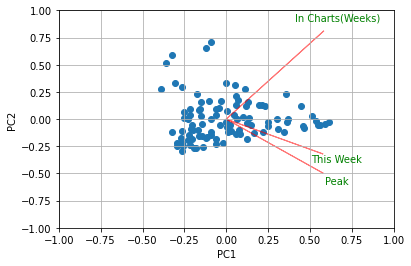

In [35]:
from matplotlib import pyplot as plt

# Biplot 시각화 
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(B, pca_chart.components_, 1, 2, labels=new_df.columns)

Biplot에서는, 각 축(빨간색)이 서로 가까울수록 서로 관련성이 높은 변수라는 의미이다. 
Biplot 시각화 결과, 주간 순위(This Week)는 아티스트의 차트인 기간(In Charts(Weeks))보다 최고순위정보(Peak)에 더 영향을 많이 받는 것으로 나타났다. 아티스트가 차트에 얼마나 오래 머물렸는지보다, 얼마나 높은 순위를 기록했는지가 아티스트의 주간 순위에 더 큰 영향이 있다는 뜻이다. 즉, 아티스트가 독일 차트에서 기록한 순위가 높을 수록, 다음에 그 아티스트가 새로운 노래를 들고 나왔을 때 주간 순위에서 더 높은 순위를 기록할 가능성이 높다는 뜻이다. 또한, 주간 순위가 높은 아티스트일수록, 그 아티스트의 최고 순위도 높을 가능성이 높다. 

또한 위 그래프에 따르면, 비록 주간 순위와의 상관관계는 최고 순위기록보다는 덜 하지만, 주간 순위가 높을 수록 차트에 더 오래 머물 확률도 어느 정도 높아진다고 볼 수 있다. 흥미로운 것은, 최고순위정보와 차트인 기간과의 상관관계가, 최고순위정보와 주간 순위와의 상관관계보다 훨씬 적다는 것이다. 다시말해, **새로운 아티스트가 차트에서 높은 순위를 기록했다고 해서, 반드시 바로 차트에 오랜 기간 머물 수 있는 것은 아니라는 의미로 해석할 수 있다.** 당장 아티스트가 곡을 들고 나온 기간 동안의 주간차트순위에는, 큰 영향이 있을 수 있지만, 그 아티스트가 차트에서 롱런하기 위해서는 그만큼 시간이 더 필요하다는 의미로 해석될 수 있다. 단순히 원히트원더(One-Hit Wonder)가 아닌 오랜 기간동안 사람받는 가수가 되기 위해서는 꾸준히 좋은 순위를 기록해야 한다는 즉, 꾸준한 사랑을 받아야 한다는 의미로 해석된다. 이 것은 아마도 한때 전세계를 휩쓸었지만, 단발성 인기에 그쳤던 싸이와 강남스타일의 예로도 설명될 수 있을 것이다. 

이전의 분석에서 잠깐 확인한 Kpop 카테고리의 가수는 누구일까? 한번 확인해 보기로했다.

In [37]:
Kpop = df_germany["Genre"] == "Kpop"
df_germany[Kpop]

,This Week,Last Week,Artist,Title,Label,In Charts(Weeks),Peak,Genre,Country
54,55,61,BTS,Dynamite,2020 BigHit Entertainment,5,8,Kpop,South Korea


그 주인공은 BTS의 Dynamite였다. BTS의 이 곡은 차트에서 주간 순위 55위를 기록했다. 지난 주 61위에서 6계단이나 상승한 수치다. 바로 이전에, PCA및 Biplot을 통해 아티스트의 최고순위가 주간 순위에 영향이 있다는 것을 확인했다. 그렇기 때문에, 최고 순위 8위를 기록한 BTS는 다음번에 새로운 곡을 들고 나왔을 때, 더 높은 주간 순위를 기록할 가능성이 높다고 할 수 있다. 또한 이 차트에서 5주 동안 머문 것으로 보아, BTS는 단발성의 인기가 아닌 꾸준한 인기를 누린 것으로 보인다. 지난 주보다 상승한 순위로 미루어보아, 다음 주, 혹은 그 이상의 기간동안 이 차트에 머물 수도 있을 것으로 보인다. BTS가 이렇게 꾸준하게 독일 차트에서 좋은 순위를 기록한다면, 그만큼 차트에 더 오래 머물 확률도 높아질 것이다. BTS로 대표되는 한국음악도 독일에서 상당히 사랑받고 있고, 앞으로도 더 사랑 받을 확률이 높다는 의미로 해석될 수 았다.

## 3. 결론(인사이트)

위 분석을 바탕으로 내린 결론을 종합해보면 아래와 같다.

* 독일에서는 힙합이 대세이다. 독일가수이면서, 힙합가수가 가장 대중적으로 인기가 많다.
* 독일인들은 영미권 음악을 많이 소비하며, 현재 힙합이 가장 인기가 많은 만큼, 힙합의 본고장인 미국의 음악을 외국음악중 가장 많이 소비한다.
* 영미권 아티스트들의 인기는 독일 아티스트들의 인기 못지 않다. (독일도 영미권 음악시장에 상당한 영향을 받는다.)
* 최고순위기록이 높은 아티스트일수록, 새로운 곡을 들고 나왔을 때, 더 높은 주간차트순위를 기록할 가능성이 높다.
* 꾸준히 차트에서 좋은 성적을 올리는 가수가 되기 위해서는, 꾸준히 차트에서 좋은 기록을 이어나가야 한다. (꾸준한 사랑을 받아야 한다.)  
* 독일 음악시장에서, BTS를 앞세운 한국 음악의 미래는 밝다.

